## Assignment 2  ME 781  (Data Scale)

### Perform the following tasks in sequence:

1. Create a list of 5 open data sets available for machine learning along with their links for each of the three Data Types (Discrete data Type, Sequential (temporal) data Type and Spatial data Type)


2. Write a python code to input a dataset (csv file) of Discrete data type, automatically identify and print the

    a. Number of attributes and number of entries
    
    b. Data scale of each attribute
    
    c. Data value of each attribute


3.      Write a python code to perform statistics on each data column based on its data scale.


4.      Can we use a box plot for visualizing ordinal data? (Yes/No). Explain why. 

![MicrosoftTeams-image2.png](attachment:MicrosoftTeams-image2.png)


5.      Write a python code to visualize data in the csv file (a generalized method depending upon data scale) 

    Assignment instructions:
    1. Naming convention: Please name your colab files as rollnumber_A2.ipynb. 
    2. Learn how to use markdown to add texts in colab to make your code interactive and understandable. 
    3. After completion of your assignment download the file as .ipynb and submit itusing Teams assignment tab.

  ###  We have a software to check plagiarism in code, if anyone found copying the code, strict action will be taken against such students and can also be given FR grade directly.
    
  We  expect  you  to  upload  colab  notebooks  when  you  are  required  to  turn  your  programming assignments.  Please  make  sure  that  you  provide  enough  comments  in  the  code  for  the TAs to understand 
       

### Libraries

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### 1. List of 5 open data sets

In [174]:
## Paste the URLs of open datasets here and add comments describing the dataset
url1 = "https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv"
url2 = "https://raw.githubusercontent.com/fivethirtyeight/data/master/fight-songs/fight-songs.csv"
url3 = "https://raw.githubusercontent.com/fivethirtyeight/data/master/world-cup-predictions/wc-20140609-140000.csv"
url4 = "https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_1994-2003_CDC_NCHS.csv"
url5 = "https://raw.githubusercontent.com/fivethirtyeight/data/master/librarians/librarians-by-msa.csv"

# github link for url1 = "https://github.com/fivethirtyeight/data/blob/master/airline-safety/airline-safety.csv"
# github link for url2 = "https://github.com/fivethirtyeight/data/blob/master/fight-songs/fight-songs.csv"
# github link for url3 = "https://github.com/fivethirtyeight/data/blob/master/world-cup-predictions/wc-20140609-140000.csv"
# github link for url4 = "https://github.com/fivethirtyeight/data/blob/master/births/US_births_1994-2003_CDC_NCHS.csv"
# github link for url5 = "https://github.com/fivethirtyeight/data/blob/master/librarians/librarians-by-msa.csv"

### 2.   Write a python code to input a dataset (csv file) of Discrete datatype, automatically identify and print the

    a. Number of attributes and number of data points
    
    b. Data scale of each attribute
    
    c. Data value of each attribute

#### Note: The number of categories for categorical (nominal,ordinal) data scale for the evaluating datasets is not greater than 8.

In [175]:
def data_description(filename):
    ## Write a well commented function that inputs dataset file location (.csv file) and outputs the following
    ## 1. data_scale (of length = number of attributes)
    ## 2. data_value (of length = number of attributes)
    ## 3. imported dataset for later use
    ## It should also print those details for each attribute(Output must be similar to what is mentioned below)

    # the pd.read_csv() function takes a filepath as its first input and returns a Pandas Dataframe
    df = pd.read_csv(filename)      # the filename should be in the string format with the url of the csv file
    print("This dataset contains {} entries, each with {} attributes".format(len(df),df.shape[1]))
    print()
    data_scale = []      # list to store the data scale of each attribute
    data_value = []      # list to store the data value of each attribute
    data_types = df.dtypes
    for i in range(df.shape[1]):
      if data_types[i] == 'object':
        data_scale.append("nominal")      
        data_value.append("discrete")    # Data value of categorical data must be discrete
      elif data_types[i] == 'float':
        # if the number of categories(unique values) are less than or equal to 8, then the data scale must be nominal or ordinal
        if df.iloc[:,i].nunique(dropna = True) <= 8:   
          try:
            df.iloc[0,i] > df.iloc[1,i]    # checking if the greater than operation is valid or not
            isValid = True         
          except:
            isValid = False 
          if isValid:
            data_scale.append("ordinal")   # if the greater than operation is valid, then it must be ordinal data scale
          else:
            data_scale.append("nominal")
        else:
          # if the number of categories(unique values) are less than or equal to 8, then the data scale must be interval or ratio
          data_scale.append("ratio")
        data_value.append("continuous")    # if the data is floating type, then it must be continuous data 
      else:
        if df.iloc[:,i].nunique(dropna = True) <= 8:   
          try:
            df.iloc[0,i] > df.iloc[1,i]    # checking if the greater than operation is valid or not
            isValid = True         
          except:
            isValid = False 
          if isValid:
            data_scale.append("ordinal")   # if the greater than operation is valid, then it must be ordinal data scale
          else:
            data_scale.append("nominal")
        else:
          # if the number of categories(unique values) are less than or equal to 8, then the data scale must be interval or ratio
          data_scale.append("ratio")
        # if the range of values is less than or equal to 100, then the data values are discrete 
        if np.max(df.iloc[:,i]) - np.min(df.iloc[:,i]) <= 100:
          data_value.append("discrete")      
        else:    # if the range of values is greater to 100, then the data values are continuous 
          data_value.append("continuous")
      print("{} {} : {}, {}".format(i,df.columns[i],data_scale[i],data_value[i]))
    # return data_scale, data_value, df
data_description(url1)
print()
data_description(url2)
print()
data_description(url3)
print()
data_description(url4)
print()
data_description(url5)

This dataset contains 56 entries, each with 8 attributes

0 airline : nominal, discrete
1 avail_seat_km_per_week : ratio, continuous
2 incidents_85_99 : ratio, discrete
3 fatal_accidents_85_99 : ratio, discrete
4 fatalities_85_99 : ratio, continuous
5 incidents_00_14 : ratio, discrete
6 fatal_accidents_00_14 : ordinal, discrete
7 fatalities_00_14 : ratio, continuous

This dataset contains 65 entries, each with 23 attributes

0 school : nominal, discrete
1 conference : nominal, discrete
2 song_name : nominal, discrete
3 writers : nominal, discrete
4 year : nominal, discrete
5 student_writer : nominal, discrete
6 official_song : nominal, discrete
7 contest : nominal, discrete
8 bpm : ratio, continuous
9 sec_duration : ratio, continuous
10 fight : nominal, discrete
11 number_fights : ratio, discrete
12 victory : nominal, discrete
13 win_won : nominal, discrete
14 victory_win_won : nominal, discrete
15 rah : nominal, discrete
16 nonsense : nominal, discrete
17 colors : nominal, discrete
18

    Output must similar to this:
    
    This dataset contains 649 entries, each with 6 attributes

    0 gender : nominal, discrete
    1 age : ratio, discrete
    2 health_rating : ordinal, discrete
    3 StudentIQ : ratio, discrete
    4 no_of_courses : ratio, discrete
    5 Marks : ratio, continuous


### 3. Write a python code to perform statistics on each data column based on its data scale.

In [183]:
def stats(filename):
    ## Write a well commented function that calls the function data_description and prints
    ## relevant statistics based on data scale.
    ## Hint: Explore describe()
    # the pd.read_csv() function takes a filepath as its first input and returns a Pandas Dataframe
    df = pd.read_csv(filename)      # the filename should be in the string format with the url of the csv file
    print(df.describe())
    return
stats(url2)

              bpm  sec_duration  number_fights  trope_count
count   65.000000     65.000000      65.000000    65.000000
mean   128.800000     71.907692       2.846154     3.615385
std     33.152677     25.056014       3.231828     1.674182
min     65.000000     27.000000       0.000000     0.000000
25%     90.000000     58.000000       0.000000     3.000000
50%    140.000000     67.000000       2.000000     4.000000
75%    151.000000     85.000000       5.000000     5.000000
max    180.000000    172.000000      17.000000     8.000000


    Output must be some what similar to this:

    gender
    mode F
    F    383
    M    266
    Name: gender, dtype: int64 

    age
    mode      17.000000
    mean      16.744222
    std        1.218138
    min       15.000000
    25%       16.000000
    median    17.000000
    75%       18.000000
    max       22.000000
    Name: age, dtype: float64 

    health_rating
    mode   5
    median 4
    1     90
    2     78
    3    124
    4    108
    5    249
    Name: health_rating, dtype: int64 

    StudentIQ
    mode     104.000000
    mean     100.229584
    std       10.256494
    min       75.000000
    25%       93.000000
    median   101.000000
    75%      107.000000
    max      131.000000
    Name: StudentIQ, dtype: float64 

    no_of_courses
    mode      17.000000
    count    649.000000
    mean      10.596302
    std        5.714697
    min        1.000000
    25%        5.000000
    median    11.000000
    75%       16.000000
    max       20.000000
    Name: no_of_courses, dtype: float64 

    Marks
    mode      52.810000
    count    649.000000
    mean      75.137257
    std       14.559722
    min       50.120000
    25%       62.560000
    median    75.120000
    75%       87.670000
    max       99.860000
    Name: Marks, dtype: float64 

### 4. Can we use a box plot for visualizing ordinal data ? (Yes/No). Explain why.
![MicrosoftTeams-image2.png](attachment:MicrosoftTeams-image2.png)

### Write your answer here. 
    NO because ordinal data have very few categories and so they doesn't have a distribution. Hence bar graphs are used to plot them.

###   5.  Write a python code to visualize the data (a generalized method depending on data scale) 

<Figure size 432x288 with 0 Axes>

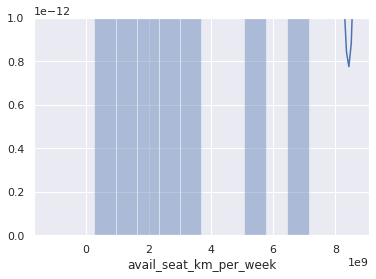

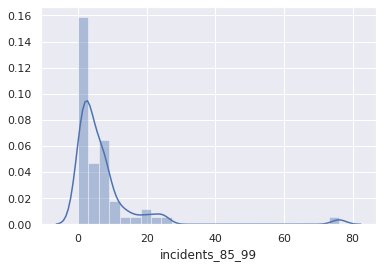

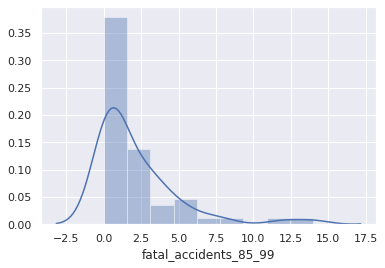

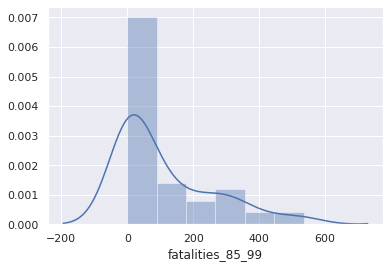

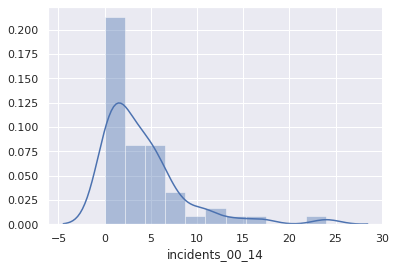

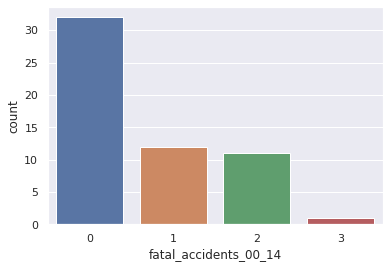

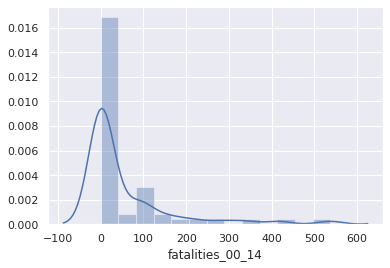

In [252]:
def visualize_data(filename):
    ## Write a well commented function that can call any of the functions from above 
    ## to plot relevant plots
    ## Hint: Use sns.distplot, sns.countplot. Make a new figure for each plot (plt.figure(i))

    # the pd.read_csv() function takes a filepath as its first input and returns a Pandas Dataframe
    df = pd.read_csv(filename)      # the filename should be in the string format with the url of the csv file
    data_types = df.dtypes
    columns = df.columns
    for i in range(df.shape[1]):
      plt.figure(i)
      sns.set(style="darkgrid")
      if data_types[i] == 'object':
        if df.iloc[:,i].nunique() <= 8:
          ax = sns.countplot(x=pd.Series(df.iloc[:,i], name = columns[i]),data=df)
      else:
        if df.iloc[:,i].nunique() <= 8:
          ax = sns.countplot(x=pd.Series(df.iloc[:,i], name = columns[i]),data=df)
        else:
          ax = sns.distplot(pd.Series(df.iloc[:,i], name = columns[i]))
    return
visualize_data(url1)   # change the input to url1, url2, url3, url4 to test the data for visualisation